   # The Sparks Foundation
   GRIP ( Graduate Rotational Internship Program) April 2024

 #### By Aditya Kumar Gupta

# Data Science And Business Analytics

# Task  3 
Exploratory Data Analysis - Retail

# Problem Statement
• Perform 'Exploratory Data Analysis' on dataset 'SampleSuperstore'.

• As a business manager, try to find out the weak areas where you can work to make more profit.

• What all business problems you can derive by exploring the data?


In [1]:
# Importing the required libraries.
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

# Dataset :- SampleSuperstore

In [2]:
# Load the dataset.
superStore = pd.read_csv(r"C:\Users\adity\Downloads\SampleSuperstore.csv", index_col=0)
superStore

,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
Ship Mode,,,,,,,,,,,,
Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...
Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.5760,2,0.20,19.3932


# Cleaning and Understanding the dataset

In [3]:
superStore.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9994 entries, Second Class to Second Class
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Segment       9994 non-null   object 
 1   Country       9994 non-null   object 
 2   City          9994 non-null   object 
 3   State         9994 non-null   object 
 4   Postal Code   9994 non-null   int64  
 5   Region        9994 non-null   object 
 6   Category      9994 non-null   object 
 7   Sub-Category  9994 non-null   object 
 8   Sales         9994 non-null   float64
 9   Quantity      9994 non-null   int64  
 10  Discount      9994 non-null   float64
 11  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(7)
memory usage: 1015.0+ KB


In [4]:
# Checking for the null values.
superStore.isnull().sum()

Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [5]:
# Checking for the duplictes.
superStore.duplicated().sum()

36

In [6]:
# Deleting the duplicates.
superStore.drop_duplicates(inplace=True)

In [7]:
superStore.duplicated().sum()

0

In [8]:
# Descriptive analysis of the Dataset.
superStore.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9958.000000,9958.000000,9958.000000,9958.000000,9958.000000
mean,55154.066680,230.528289,3.792428,0.156456,28.731777
std,32052.176435,624.250635,2.228080,0.206572,234.679428
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.340000,2.000000,0.000000,1.724800
50%,55901.000000,54.910000,3.000000,0.200000,8.671500
75%,90008.000000,209.984250,5.000000,0.200000,29.483550
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [9]:
# Sales performance by Category
category_sales =superStore.groupby('Category')['Sales'].sum().sort_values(ascending=False)
print(category_sales)

Category
Technology         836116.9130
Furniture          741282.2133
Office Supplies    718201.5780
Name: Sales, dtype: float64


We can conclude that Technology has highest performance by sales in Category.

In [10]:
# Sales performance by Sub-Category
subcat_sales = superStore.groupby('Sub-Category')['Sales'].sum().sort_values(ascending=False)
print(subcat_sales)

Sub-Category
Phones         329995.9340
Chairs         327777.7610
Storage        223548.0880
Tables         206965.5320
Binders        203389.8730
Machines       189238.6310
Accessories    167354.3180
Copiers        149528.0300
Bookcases      114879.9963
Appliances     107532.1610
Furnishings     91658.9240
Paper           78042.2060
Supplies        46673.5380
Art             27089.0820
Envelopes       16476.4020
Labels          12430.2920
Fasteners        3019.9360
Name: Sales, dtype: float64


We can conclude that Phones has highest performance by Sales in Sub-Category.

In [11]:
# Sales performance by Region
region_sales = superStore.groupby('Region')['Sales'].sum().sort_values(ascending=False)
print(region_sales)

Region
West       725105.6505
East       678035.4200
Central    500767.3888
South      391692.2450
Name: Sales, dtype: float64


In [12]:
# Profitability by City
city_profit = superStore.groupby('City')['Profit'].sum().sort_values(ascending=False)
city_profit

City
New York City    61986.9953
Los Angeles      30394.1635
Seattle          29112.3513
San Francisco    17450.5666
Detroit          13146.6935
                    ...    
Chicago          -6651.8068
Lancaster        -7250.1708
San Antonio      -7299.0502
Houston         -10175.1755
Philadelphia    -13852.2826
Name: Profit, Length: 531, dtype: float64

The city with highest profit is New York City.

In [13]:
# Impact of Discounts
discount_impact = superStore.groupby('Discount')['Profit'].mean().reset_index()
print(discount_impact)

    Discount      Profit
0       0.00   67.185707
1       0.10   96.055074
2       0.15   27.288298
3       0.20   24.753512
4       0.30  -45.828401
5       0.32  -88.560656
6       0.40 -111.927429
7       0.45 -226.646464
8       0.50 -310.703456
9       0.60  -43.077212
10      0.70  -95.874060
11      0.80 -102.116395


On increasing the discount profit gets decreases.

Segment
Consumer       133943.8581
Corporate       91914.8264
Home Office     60252.3471
Name: Profit, dtype: float64


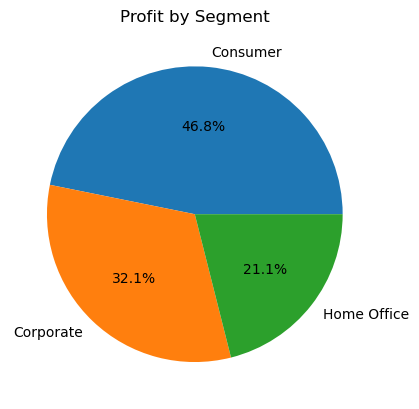

In [14]:
# Profitability by Segment
segment_profit = superStore.groupby('Segment')['Profit'].sum().sort_values(ascending=False)
print(segment_profit)
# Pie chart of Profit by Segment
plt.pie(segment_profit, labels=segment_profit.index, autopct='%1.1f%%')
plt.title('Profit by Segment')
plt.show()

From the above pie chart we can conclude that <b>'Consumer <b>Segment' </b></b> is performing good.

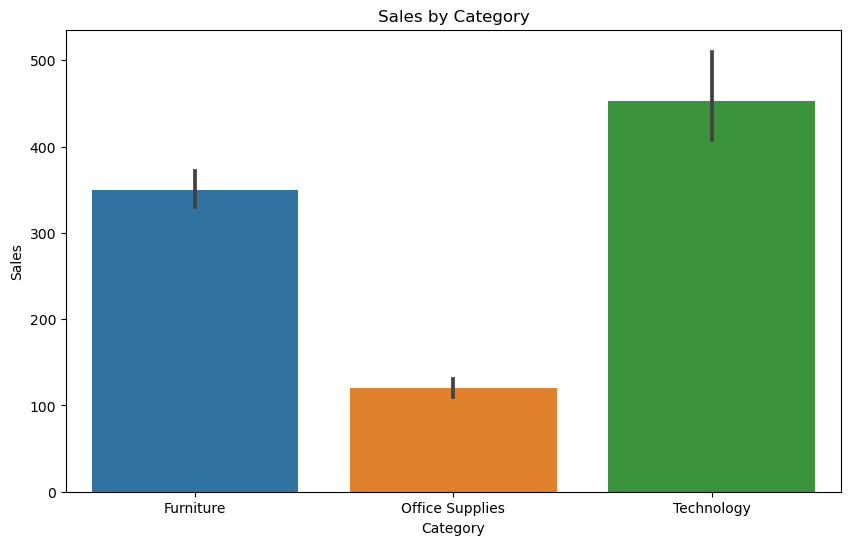

In [15]:
# Sales by Category
plt.figure(figsize=(10, 6))
sns.barplot(x='Category', y='Sales', data=superStore)
plt.title('Sales by Category')
plt.xlabel('Category')
plt.ylabel('Sales')
plt.show()

From the above  Bar graph we can conclude that <b>'Technology' </b>has highest Sales in Category.

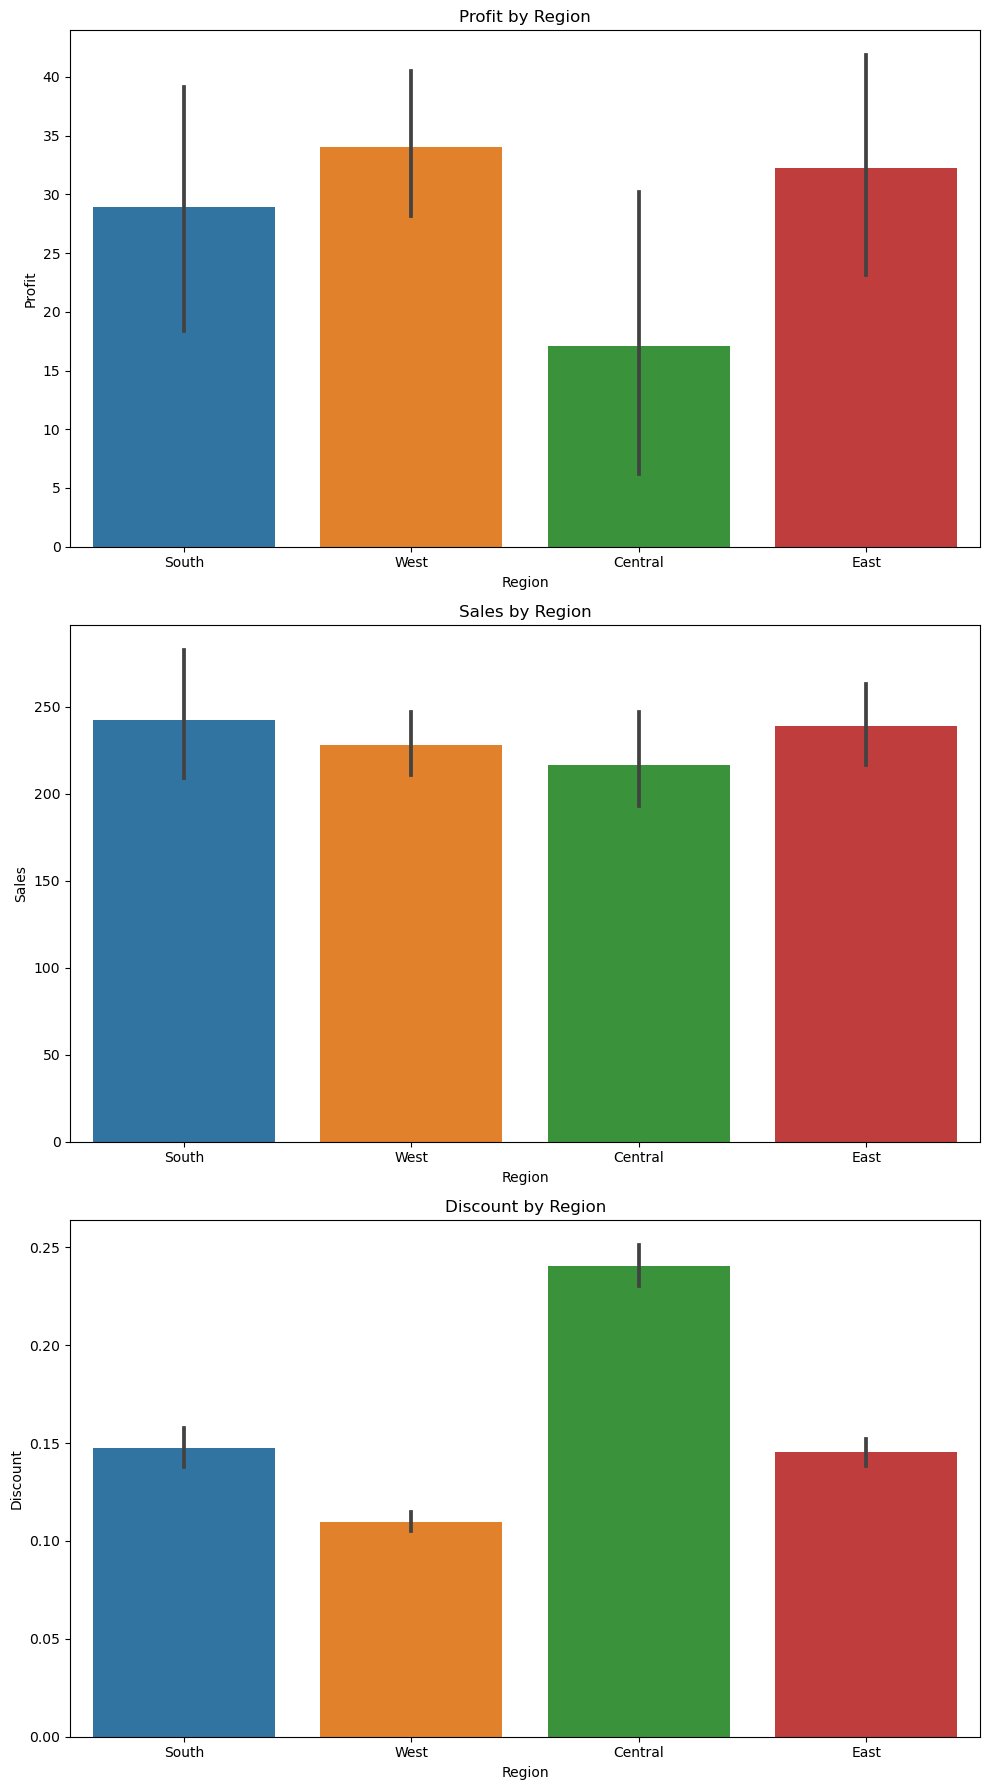

In [16]:
# Create subplots
fig, axes = plt.subplots(3, 1, figsize=(10, 18))

# Plot Profit by Region
sns.barplot(ax=axes[0], x='Region', y='Profit', data=superStore)
axes[0].set_title('Profit by Region')
axes[0].set_xlabel('Region')
axes[0].set_ylabel('Profit')

# Plot Sales by Region
sns.barplot(ax=axes[1], x='Region', y='Sales', data=superStore)
axes[1].set_title('Sales by Region')
axes[1].set_xlabel('Region')
axes[1].set_ylabel('Sales')

# Plot Discount by Region
sns.barplot(ax=axes[2], x='Region', y='Discount', data=superStore)
axes[2].set_title('Discount by Region')
axes[2].set_xlabel('Region')
axes[2].set_ylabel('Discount')

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

From the above  Bar graph we can conclude that <b>'West' </b>has highest profit by Region.

From the above  Bar graph we can conclude that <b>'South' </b>has highest Sales  by Region.

From the above  Bar graph we can conclude that <b>'Central' </b>has highest Discount by Region.

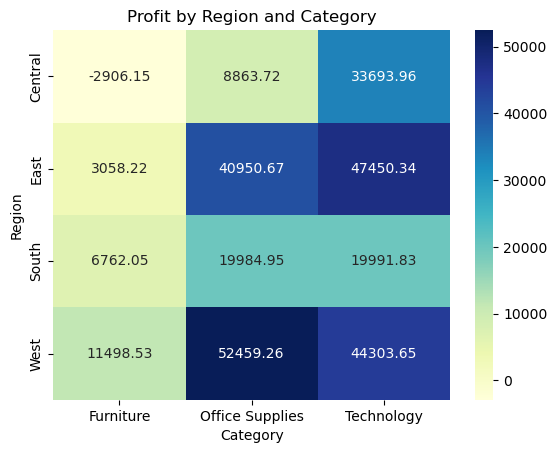

In [17]:
# Heatmap of Profit by Region and Category
heatmap_data = superStore.pivot_table(index='Region', columns='Category', values='Profit', aggfunc='sum')
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt=".2f")
plt.title('Profit by Region and Category')
plt.show()

From the above  heat map we can conclude that <b>'Office Supplies Category' </b>has highest profit in the <b>'West'</b> Region where as <b>'Furniture' </b> has least profit in <b>'Central'</b> Region.

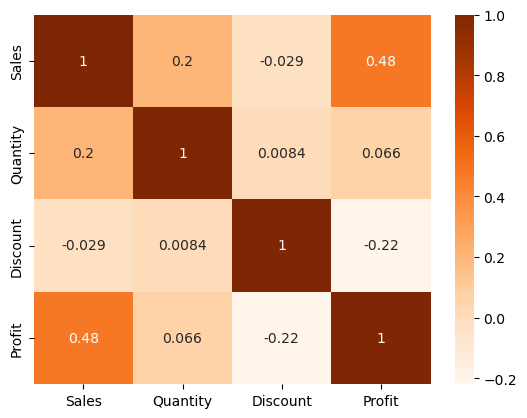

In [18]:
numeric_cols = superStore[['Sales', 'Quantity','Discount', 'Profit']]
correlation = numeric_cols.corr()
sns.heatmap(correlation,xticklabels =correlation.columns, yticklabels = correlation.columns, annot = True, cmap = 'Oranges')
plt.show()

From the above heat map we can conclude that :-
'Discount' and 'Profit' are negatively correlated  Whereas 'Sales' and 'Profit' are positively correlated.
  

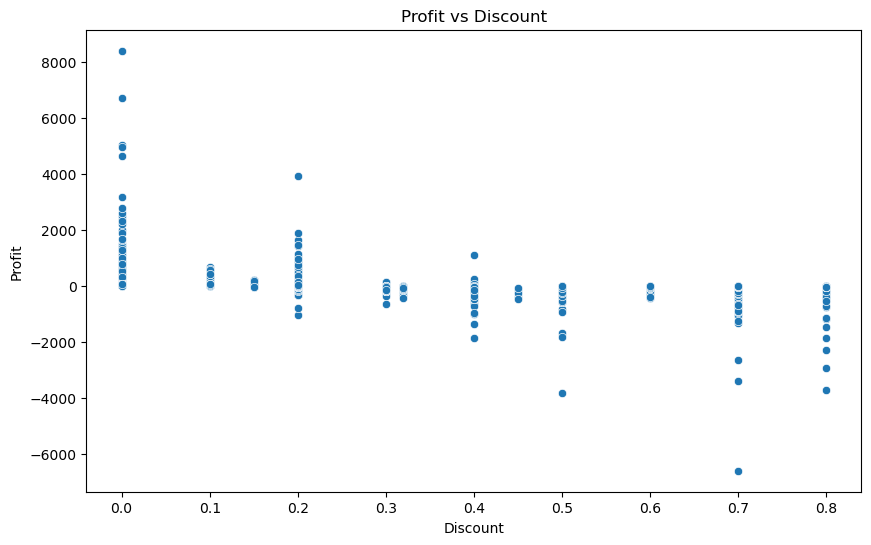

In [19]:
# Profit vs Discount
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Discount', y='Profit', data=superStore)
plt.title('Profit vs Discount')
plt.xlabel('Discount')
plt.ylabel('Profit')
plt.show()

From the above scatter plot we can conclude that as we increase the Discount, Profit gets decreased.

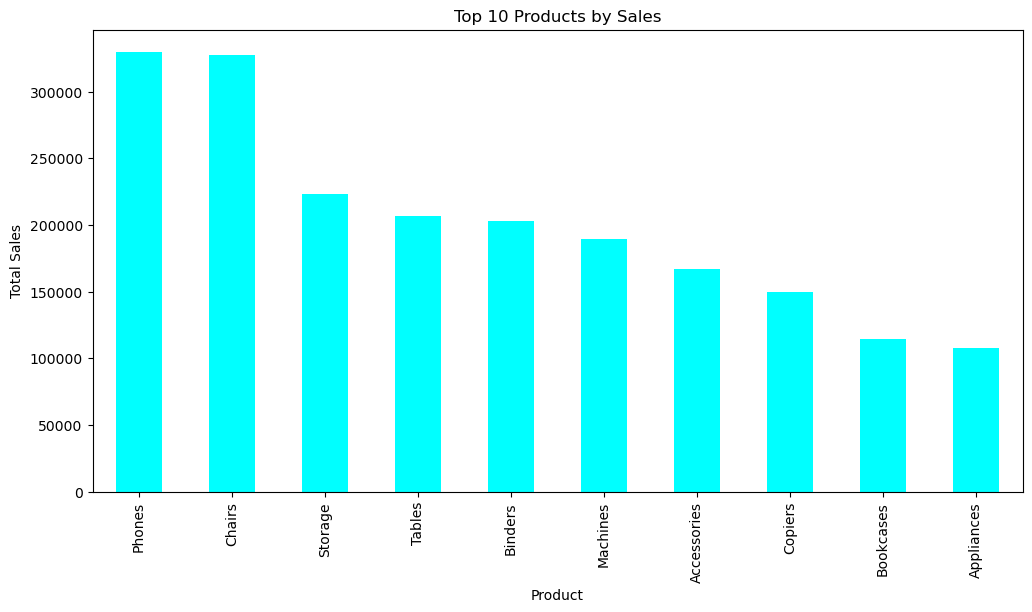

In [20]:
# Product performance analysis
top_products = superStore.groupby('Sub-Category')['Sales'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 6))
top_products.plot(kind='bar', color = 'Cyan')
plt.title('Top 10 Products by Sales')
plt.xlabel('Product')
plt.ylabel('Total Sales')
plt.show()


From the above Bar Graph we can conclude that the highest product by Sales is <b>'Phones'</b>.

In [21]:
# Calculate total sales and profit for each city
city_sales = superStore.groupby('City')['Sales'].sum().sort_values(ascending=False)
city_profit = superStore.groupby('City')['Profit'].sum().sort_values(ascending=False)

# Extract top 10 cities
top_10_cities_sales = city_sales.head(10).index
top_10_cities_profit = city_profit.head(10).index

# Filter data for top 10 cities
top_10_sales_df = superStore[superStore['City'].isin(top_10_cities_sales)]
top_10_profit_df = superStore[superStore['City'].isin(top_10_cities_profit)]

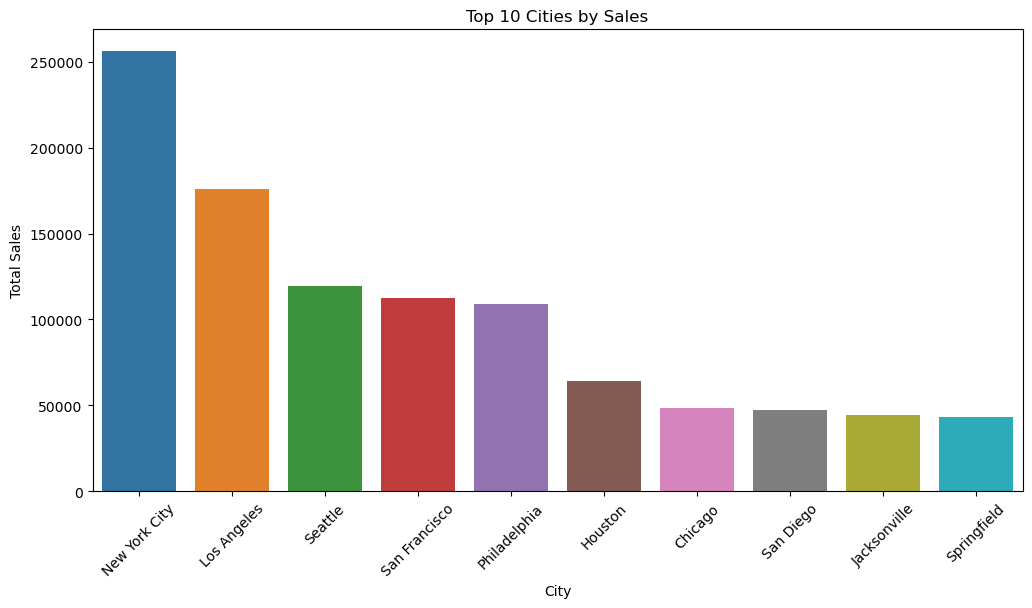

In [22]:
# Sales analysis
plt.figure(figsize=(12, 6))
sns.barplot(x='City', y='Sales', data=top_10_sales_df, estimator=sum, ci=None, order=top_10_cities_sales)
plt.title('Top 10 Cities by Sales')
plt.xlabel('City')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

From above Bar graph we can conclude that <b>'New York City'</b> has highest number of <b>'Sales'</b>.

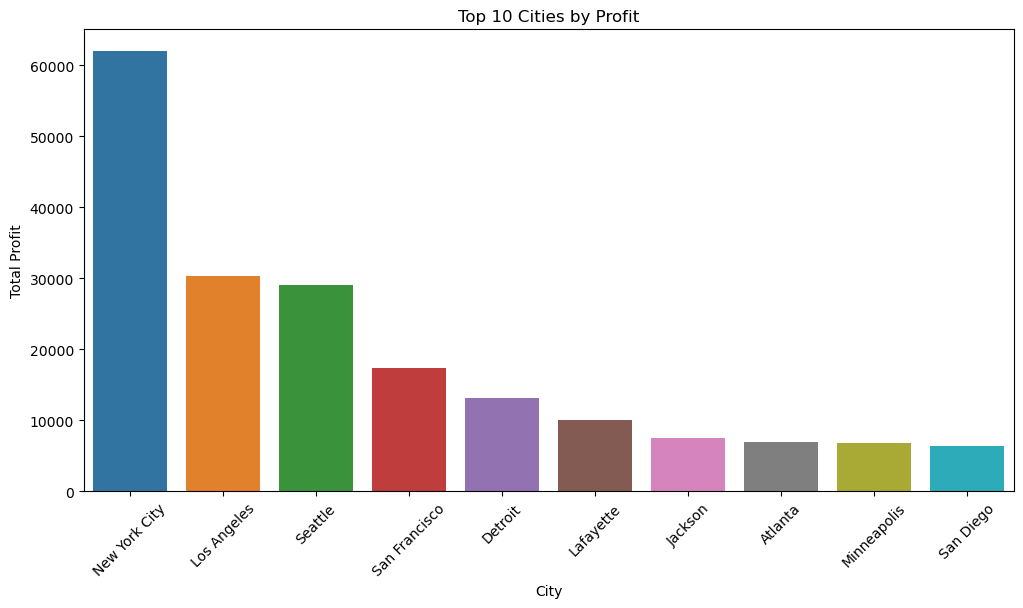

In [23]:
# Profit analysis
plt.figure(figsize=(12, 6))
sns.barplot(x='City', y='Profit', data=top_10_profit_df, estimator=sum, ci=None, order=top_10_cities_profit)
plt.title('Top 10 Cities by Profit')
plt.xlabel('City')
plt.ylabel('Total Profit')
plt.xticks(rotation=45)
plt.show()


From above Bar graph we can conclude that <b>'New York City'</b> has highest <b>'Profit'</b>.

# Conclusion.

• The top city  New York contributes a disproportionately large amount of profit in comparison to the other cities, as seen by     the bar chart.

• The best-performing products is and the worst-performing have very different sales volumes. This may indicate         areas for analysis and enhancement of the distribution, price, or marketing plans for the products that sell less well.

• Scatter plot suggests that there may be a negative relationship between profit and discount levels.This can mean that too much         discounting is hurting business, and there might be room to improve pricing and discounting tactics.

• The West Region has highest profit compared to others.

# Suggestion.

A business manager can think about carrying out an extensive examination of pricing tactics, consumer behaviour, operational procedures, market conditions, and geographical dynamics in order to address these possible problems. The results of this research may be used to guide strategic choices on the best way to optimise the product portfolio, set prices and discounts, distribute resources regionally, and boost operational effectiveness.
